# Setting Environment

In [0]:
from google.colab import drive 

drive.mount('/content/gdrive')

path = './gdrive/My Drive/Colab Demo Data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Check if GPU working

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Feature Vectorization for ML

In [0]:
sentiment_label = 'sent_TextBlob'  #sent_SWN, sent_TextBlob

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
import seaborn as sns

## Bag-of-Words Features

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_tweets_pub['tweets'])

In [0]:

train_bow = bow[:160,:]
test_bow = bow[160:,:]
train_y = df_tweets_pub.loc[:159, sentiment_label]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_y, random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

predict_p = lreg.predict_proba(xvalid_bow) # predicting on the validation set
predict_c = lreg.predict(xvalid_bow).astype('int')  # 預測標籤結果


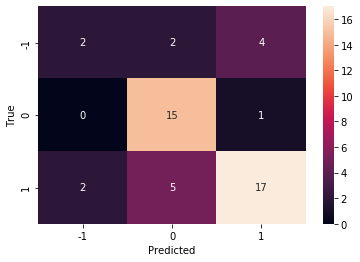

Accuracy : 0.70833
MissClass: 0.29167


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true = yvalid, y_pred = predict_c, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


## TF-IDF features

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_tweets_pub['tweets'])

In [0]:

train_tfidf = tfidf[:160,:]
test_tfidf = tfidf[160:,:]
train_y = df_tweets_pub.loc[:159, sentiment_label]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train_y, random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain) # training the model

predict_p = lreg.predict_proba(xvalid_tfidf) # predicting on the validation set
predict_c = lreg.predict(xvalid_tfidf).astype('int')  # 預測標籤結果


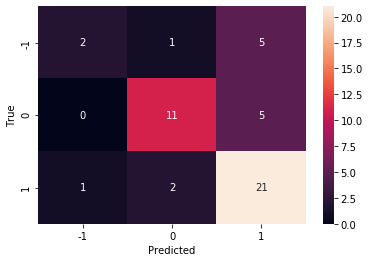

Accuracy : 0.70833
MissClass: 0.29167


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true = yvalid, y_pred = predict_c, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


## XGBoost for TF-IDF Features

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
from matplotlib import pyplot
import time

modelml = xgb.XGBClassifier(max_depth=16,
                        subsample=0.9,
                        objective='multi:softmax',
                        num_class=3,
                        n_estimators=500,
                        learning_rate = 0.01)

m1 = modelml.fit(xtrain_tfidf, ytrain)

predict_p = modelml.predict_proba(xvalid_tfidf) # predicting on the validation set
predict_c = modelml.predict(xvalid_tfidf).astype('int')  # 預測標籤結果


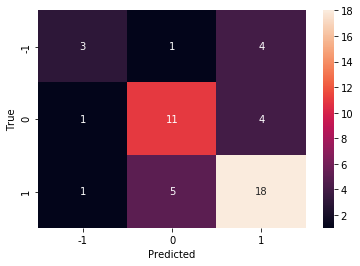

Accuracy : 0.66667
MissClass: 0.33333


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true = yvalid, y_pred = predict_c, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


### Save Model

In [0]:
# 儲存模型
from datetime import datetime
from joblib import dump, load
ymd = datetime.now().strftime("%Y%m%d%H%M")
AC = Accuracy.astype('str')

dump(m1, path + 'm1-'+ymd+'XGB'+ AC +'.joblib')